##### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
# Importing the necessary packages

import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set

df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
# Dropping the unnecessary columns and dropping duplicates

df = df.drop_duplicates()
df = df.drop(df.columns[11:30], axis = 1)
df.shape

(509, 12)

In [6]:
from sklearn import preprocessing

# Encode columns into numeric

label_encoder = preprocessing.LabelEncoder()

df['size_category'] = label_encoder.fit_transform(df['size_category'])
df.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
df.day.replace(('sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'), (1,2,3,4,5,6,7), inplace = True)

In [7]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,509.0,7.481336,2.283574,1.0,7.0,8.00,9.00,12.00
day,509.0,3.958743,2.143537,1.0,2.0,4.00,6.00,7.00
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40


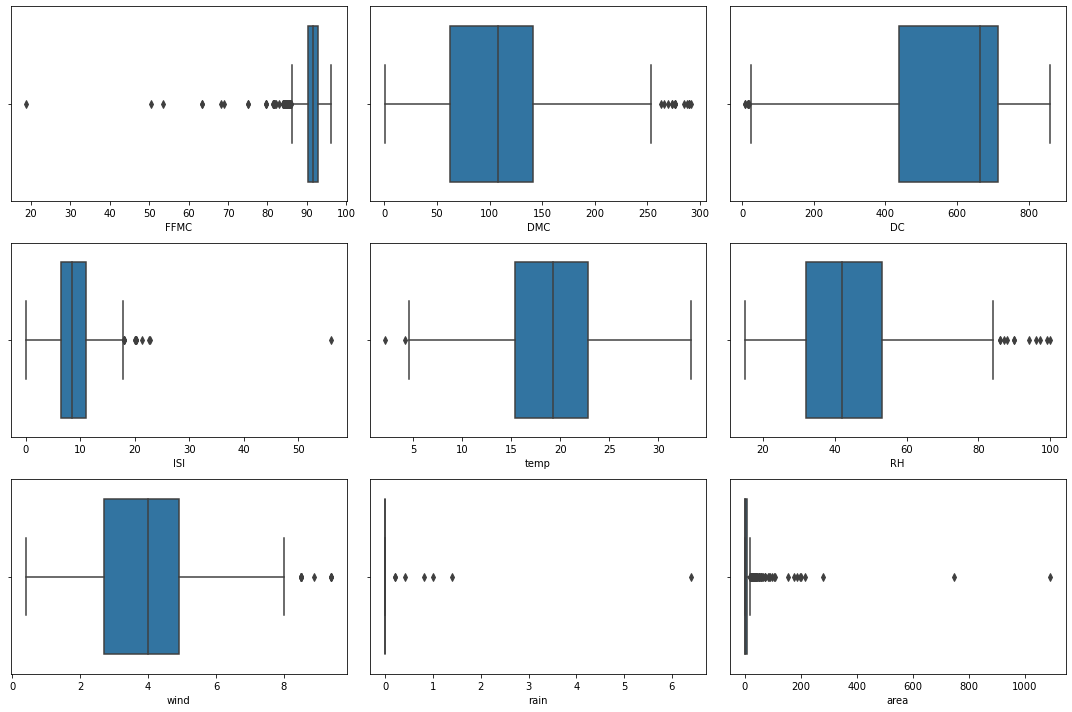

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Finding the outliers for each columns

fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.ISI, ax=ax[1,0])
sns.boxplot(df.temp, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
sns.boxplot(df.wind, ax=ax[2,0])
sns.boxplot(df.rain, ax=ax[2,1])
sns.boxplot(df.area, ax=ax[2,2])


plt.tight_layout()
plt.show()

In [10]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'size_category']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

month :  (array([  0,   3,   4,  16,  18,  39,  48,  49,  57,  58,  59,  60,  68,
        69,  71,  74,  75,  76,  88,  90,  95,  96, 102, 103, 104, 108,
       109, 112, 113, 114, 115, 116, 124, 128, 129, 130, 132, 144, 158,
       160, 163, 166, 180, 184, 186, 187, 188, 199, 200, 202, 211, 212,
       216, 219, 279, 280, 281, 374, 375, 383, 386, 389, 390, 391, 403,
       406, 407, 413, 442, 457, 458, 459, 460, 461, 462], dtype=int64),)
day :  (array([], dtype=int64),)
FFMC :  (array([ 12,  17,  40,  57,  74,  95,  96, 102, 103, 108, 121, 128, 136,
       145, 163, 169, 174, 179, 194, 197, 200, 230, 236, 238, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 281, 296, 300, 308, 375,
       386, 390, 391, 403, 406, 407, 457, 458, 459, 503, 504, 505, 506,
       508], dtype=int64),)
DMC :  (array([365, 366, 370, 380, 388, 402, 404, 418, 425, 429, 435, 439, 443,
       448, 454, 456], dtype=int64),)
DC :  (array([ 96, 102, 236, 280, 281, 457, 458, 459], dtype=int64),)

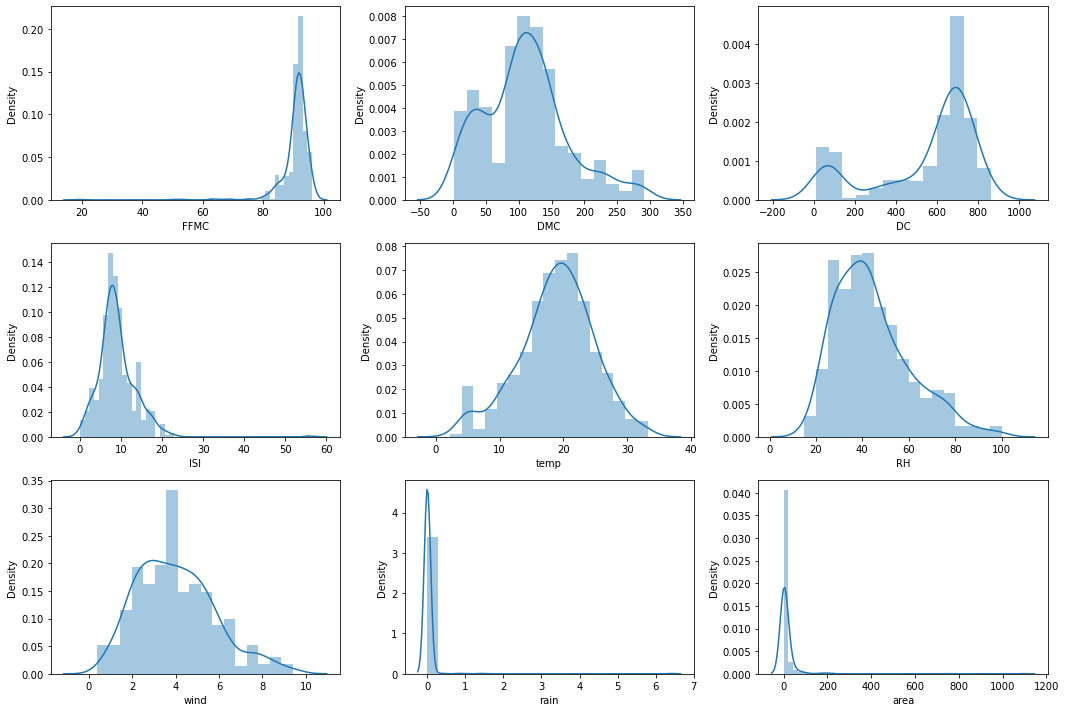

In [11]:
# Checking for normal distribution using distplot

fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.distplot(df.FFMC, ax=ax[0,0])
sns.distplot(df.DMC, ax=ax[0,1])
sns.distplot(df.DC, ax=ax[0,2])
sns.distplot(df.ISI, ax=ax[1,0])
sns.distplot(df.temp, ax=ax[1,1])
sns.distplot(df.RH, ax=ax[1,2])
sns.distplot(df.wind, ax=ax[2,0])
sns.distplot(df.rain, ax=ax[2,1])
sns.distplot(df.area, ax=ax[2,2])

plt.tight_layout()
plt.show()

In [12]:
# Correlation

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

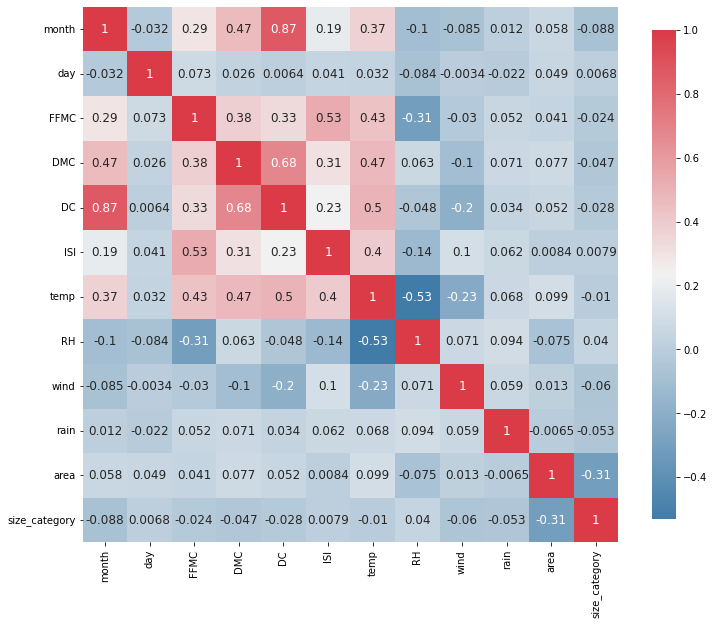

In [13]:
plot_correlation_map(df)

In [14]:
x = df.iloc[:,0:11]
y = df.iloc[:,-1]

##### Constructing a Sequential neural network with 11 input neurons in the firstlayer, 8 neurons in the hidden layer and 1 neuron in the output layer

In [15]:
model = Sequential()
model.add(Dense(11, kernel_initializer = 'random_normal', activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'random_normal', activation = 'linear'))
model.add(Dense(1, kernel_initializer = 'random_normal', activation = 'sigmoid'))

##### Using Binary cross entropy as the loss function
##### Adam as weight optimizer

In [16]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
# Fit the model

model.fit(x, y, validation_split = 0.33, epochs = 150, batch_size = 10)

Epoch 1/150
35/35 [==============================] - 1s 9ms/step - loss: 0.5907 - accuracy: 0.7566 - val_loss: 0.6654 - val_accuracy: 0.6726
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7595 - val_loss: 0.6284 - val_accuracy: 0.6786
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7654 - val_loss: 0.5856 - val_accuracy: 0.6964
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7801 - val_loss: 0.5289 - val_accuracy: 0.7381
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8006 - val_loss: 0.4743 - val_accuracy: 0.7738
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8182 - val_loss: 0.5296 - val_accuracy: 0.7679
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8358 - val_loss: 0.3764 - val_accuracy: 0.8452
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0570 - val_accuracy: 0.9821
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9853 - val_loss: 0.2047 - val_accuracy: 0.9226
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9824 - val_loss: 0.0723 - val_accuracy: 0.9524
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9824 - val_loss: 0.0793 - val_accuracy: 0.9583
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 0.0960 - val_accuracy: 0.9524
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9883 - val_loss: 0.0562 - val_accuracy: 0.9702
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9912 - val_loss: 0.0578 - val_accuracy: 0.9762
Epoch 

In [18]:
# Evaluate model

score = model.evaluate(x, y)
print('%s: %.2f%%' % (model.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9862
accuracy: 98.62%


In [19]:
history = model.fit(x, y, validation_split = 0.33, epochs = 150, batch_size = 10)

Epoch 1/150
35/35 [==============================] - 0s 4ms/step - loss: 0.0289 - accuracy: 0.9824 - val_loss: 0.0634 - val_accuracy: 0.9762
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0744 - val_accuracy: 0.9762
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9643
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9883 - val_loss: 0.0658 - val_accuracy: 0.9821
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9971 - val_loss: 0.1732 - val_accuracy: 0.9524
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9883 - val_loss: 0.0625 - val_accuracy: 0.9702
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9853 - val_loss: 0.0850 - val_accuracy: 0.9643
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9883 - val_loss: 0.0838 - val_accuracy: 0.9702
Epoch 60/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9643
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9971 - val_loss: 0.0613 - val_accuracy: 0.9762
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9941 - val_loss: 0.1043 - val_accuracy: 0.9583
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9643
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9762
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9824 - val_loss: 0.2597 - val_accuracy: 0.9405
Epoch 

In [20]:
# List all data in history

model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### Summarize history for accuracy

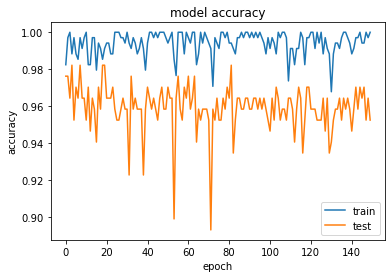

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

##### Summarize history for loss

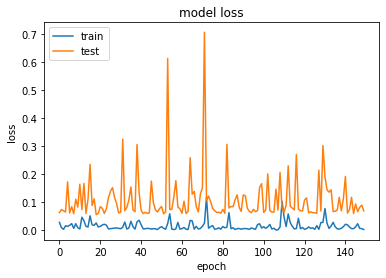

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Conclusion

- The neural network helps classifying the burnt forest areas with a highest evaluation accuracy of 98.62% and with a minimal loss of 0.0292%